# Fourier series

A Fourier series expresses a periodic function as a weighted sum of sine and cosine waves. This allows us to decompose complex, often non-smooth waveforms into simpler, smooth trigonometric components. 

In this notebook, I’ve explored the Fourier series representations of several common periodic functions — including square waves, rectified sine waves, parabolas, and staircase-like signals. Each function is approximated using a finite number of terms from its Fourier series, and I have plotted how the shape of the approximation changes as the number of terms $n$ increases.

I have done the analysis to derive $a_0$, $a_n$ and $b_n$ with pen and paper, this notebook implements the synthesis equation for different number of terms.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

I use different domains depending on the problem

In [3]:
x_a = np.linspace(-np.pi, np.pi, 1000)
x_b = np.linspace(0, np.pi, 1000)
x_c = np.linspace(0, 2*np.pi, 1000)

In [4]:
def approx_fs(x, fs_func, orig_func, title=''):
    ''' 
    This function demonstrates how an approximation approaches the aactual value.
    It constructs a 2x4 grid of plots. in each plot, it shows the orig_func and the 
    output of fs_func.

    ----parameters----
    x: Domain
    fs_func: The approximation function
    orig_func: The actual data 

    '''
    fig, ax = plt.subplots(2, 4, figsize=(20, 10))
    fig.suptitle(title, size = 24)
    #ax is a 2x4 layout. We use flatten to iterate over them.
    for i, xa in enumerate(ax.flat):
        f = fs_func(x, i+1)
        xa.plot(x, orig_func)
        xa.plot(x, f)

### Full Sine Wave Rectified


$$ f(x) = \frac{2}{\pi}  + \frac{4}{\pi} \sum_{k=1}^\infty \frac{1}{(4k^2 - 1)} \cos(2k x)$$

In [5]:
def fourier_series_rect_sine(x, n):
    f = 2/np.pi
    for k in range(1, n+1):
        #f -= (4/np.pi) * (1/(4*(k**2) - 1)) * np.cos((2*k) * x)
        f -= 4 * np.cos(2*k*x)/(np.pi * (4*k*k -1))
    return f

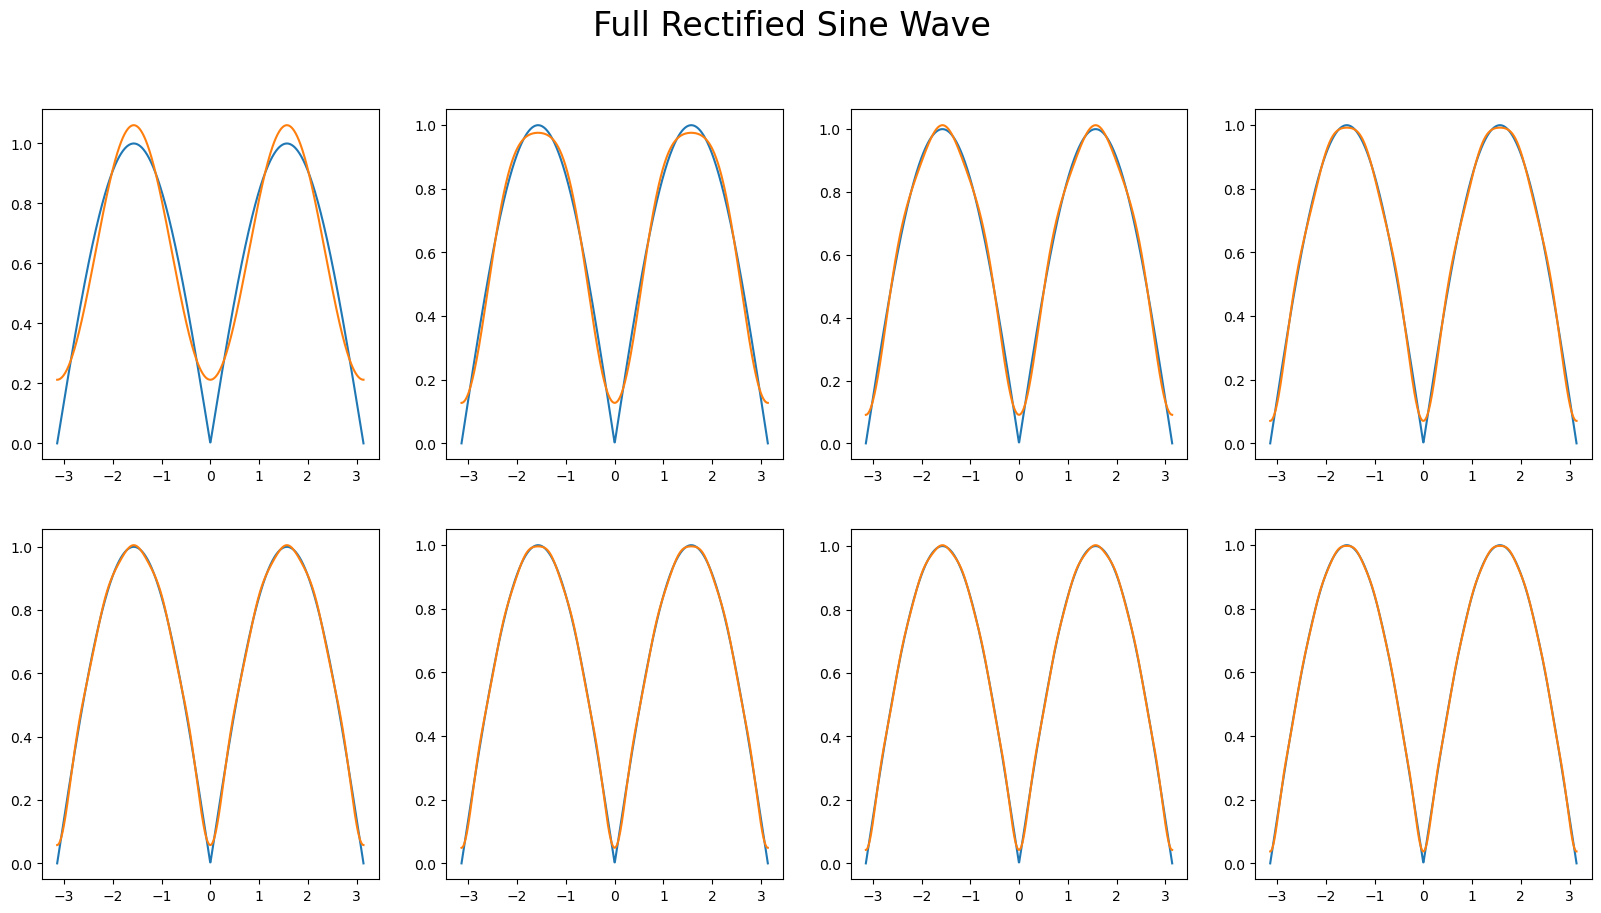

In [6]:
approx_fs(x_a, fourier_series_rect_sine, np.abs(np.sin(x_a)), 'Full Rectified Sine Wave')

### Half rectified sine wave

$$f(x) = \frac{1}{\pi} + \frac{1}{2} \sin x - \frac{2}{\pi} \sum_{k=1}^\infty \frac{1}{4k^2 - 1} \cos(2k x)$$

In [7]:
def fourier_series_rect_sine_half(x, n):
    f = 1/np.pi + np.sin(x)/2
    for k in range(1, n+1):
        f += (-2/np.pi) * (1/((4*(k**2) - 1))) * np.cos((2*k) * x)
    return f

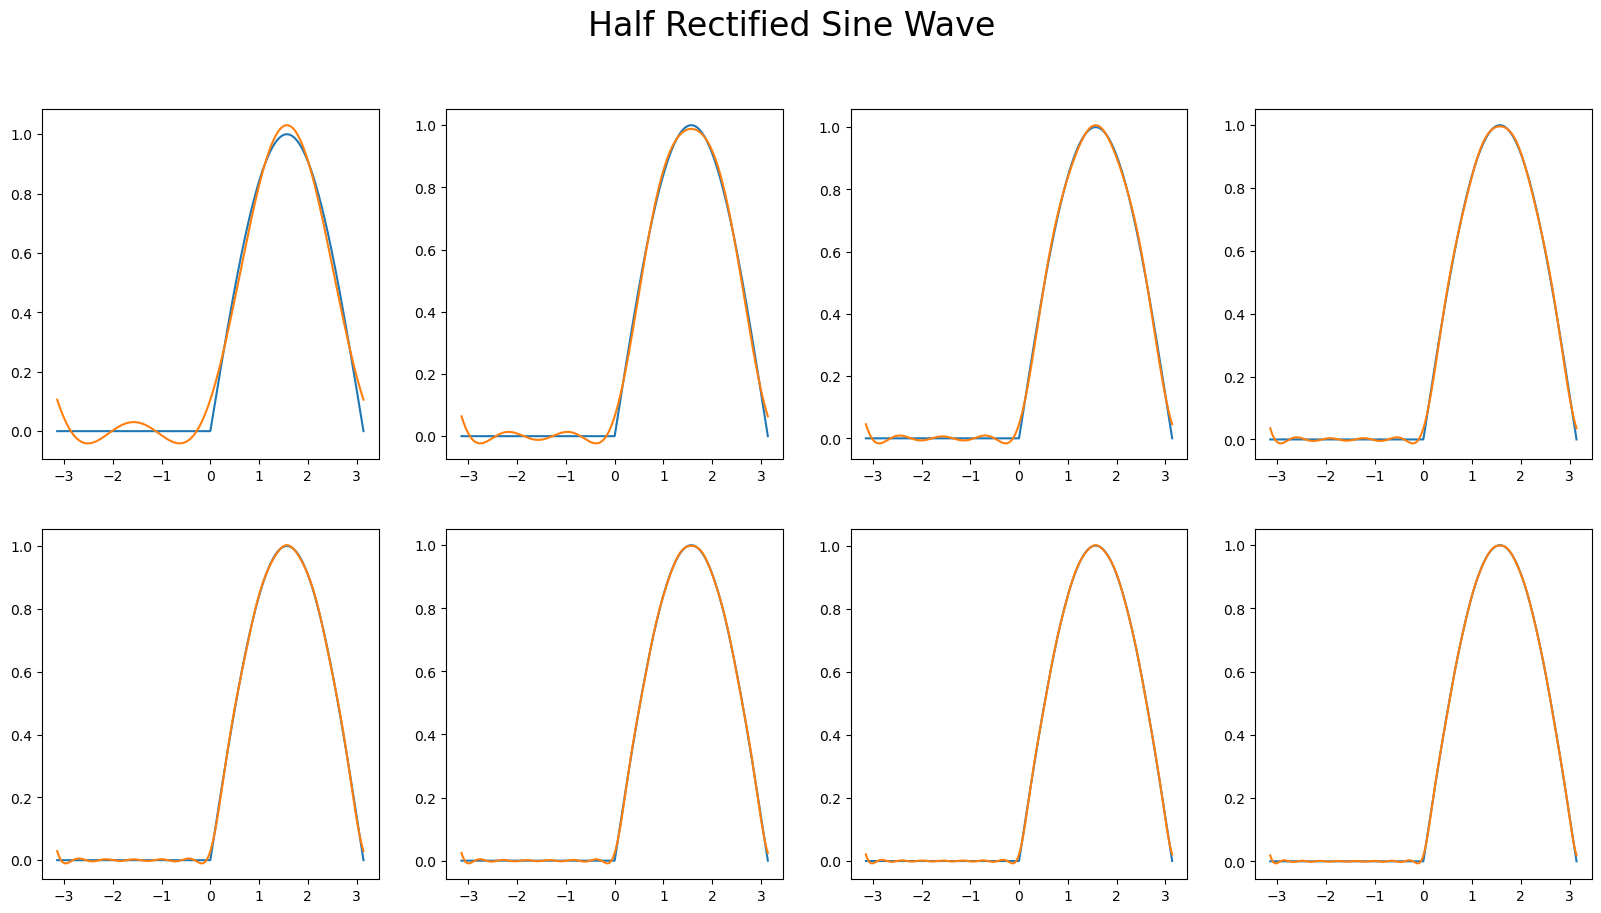

In [10]:
x1 = np.sin(x_a)
x1[:len(x_a)//2] = 0
approx_fs(x_a, fourier_series_rect_sine_half, x1,  'Half Rectified Sine Wave')

### Parabolic 

$$f(x) = \frac{\pi^2}{3} + \sum_{k=1}^\infty \frac{4(-1)^k}{k^2} \cos(kx)$$

In [12]:
def fourier_series_func(x, n):
    f = (np.pi ** 2) / 3
    for k in range(1, n + 1):
        f += (4 * (-1) ** k) / (k ** 2) * np.cos(k * x)
    return f

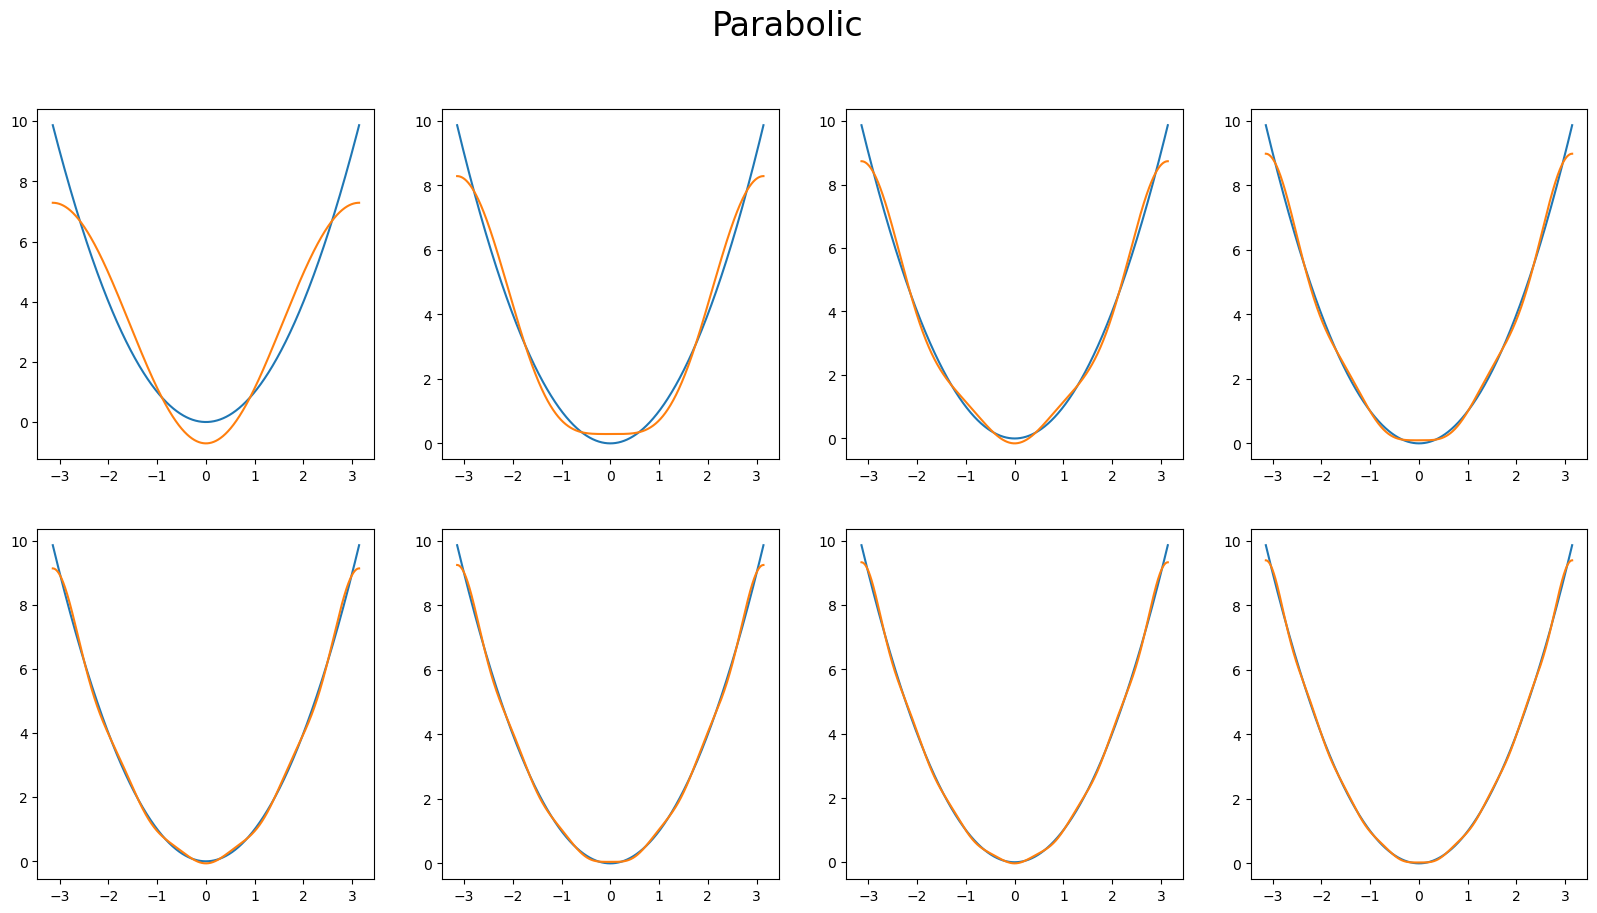

In [13]:
approx_fs(x_a, fourier_series_func, x_a**2, 'Parabolic')

### Square wave from 0 to 1

$$f(x) = \frac{1}{2} + \frac{2}{\pi} \sum_{k=1}^\infty \frac{1}{2k - 1} \sin((2k - 1)x)$$

In [ ]:
def fourier_series_sqr(x, n):
    f = 0.5
    for k in range(n):
        f += (2 / ((2*k + 1)* np.pi)) * np.sin((2*k + 1) * x)
    return f

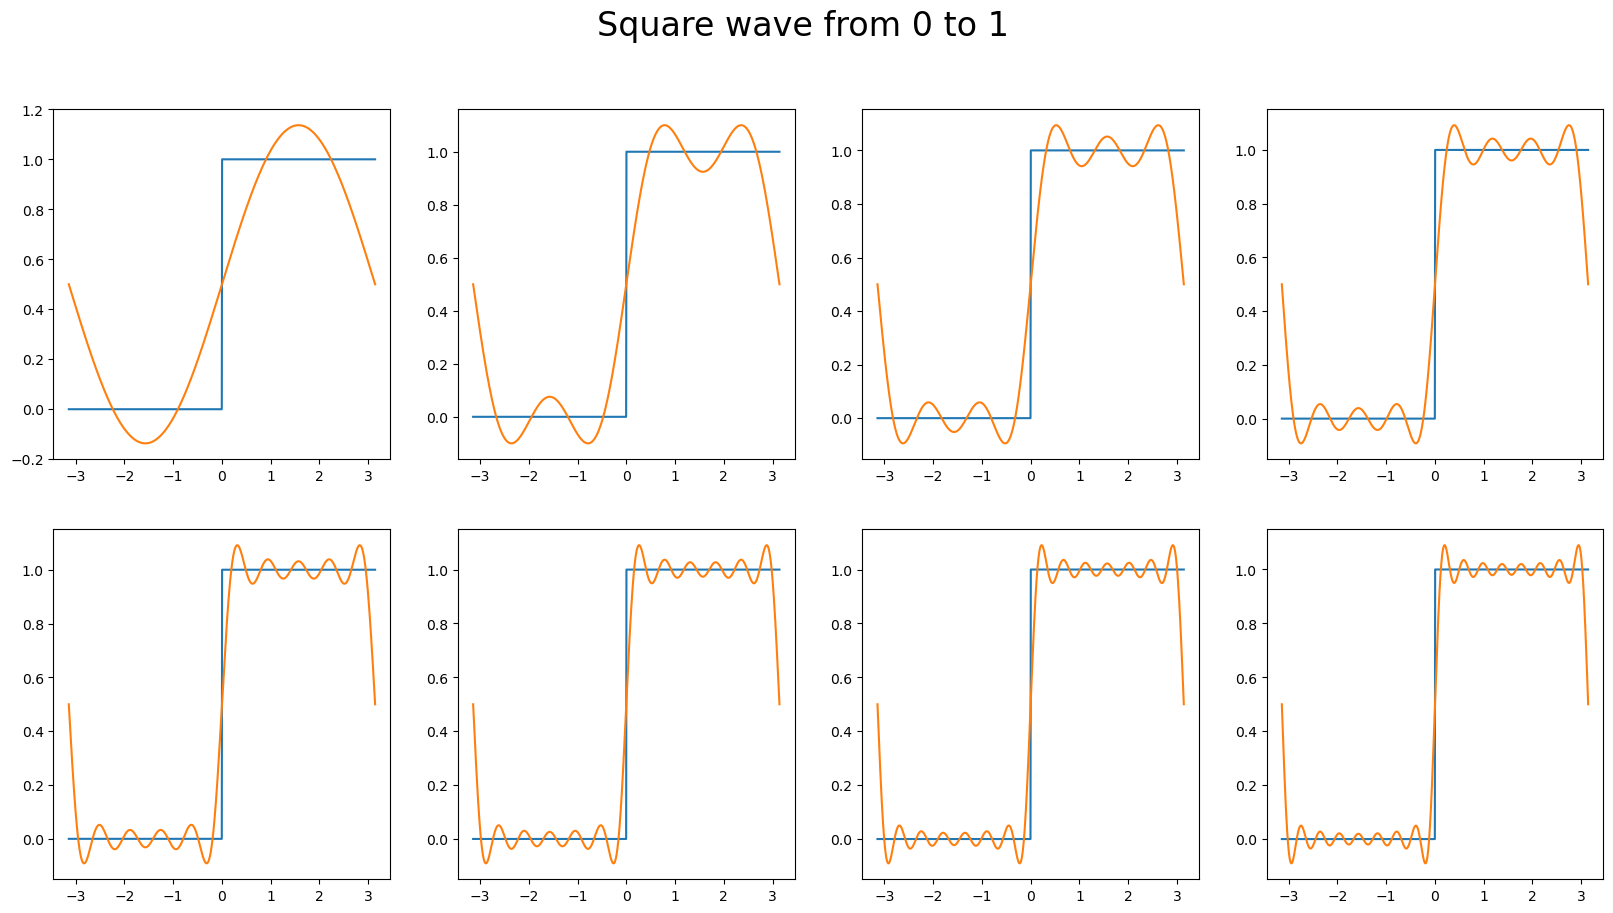

In [16]:
x1 = np.sign(np.sin(x_a))
x1[:len(x_a)//2] = 0
approx_fs(x_a, fourier_series_sqr, x1,  'Square wave from 0 to 1')

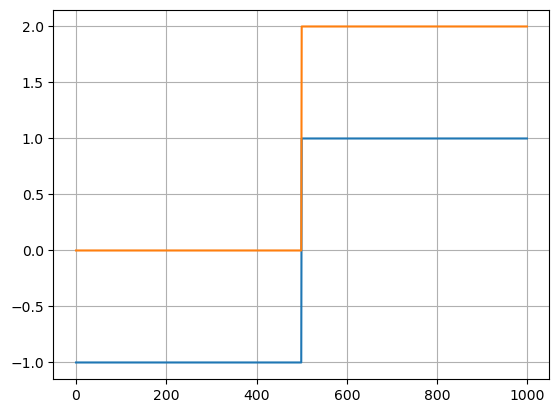

In [53]:
fx = np.sign(np.sin(x_a))
gx = fx +1
plt.plot(fx)
plt.plot(gx)
plt.grid()

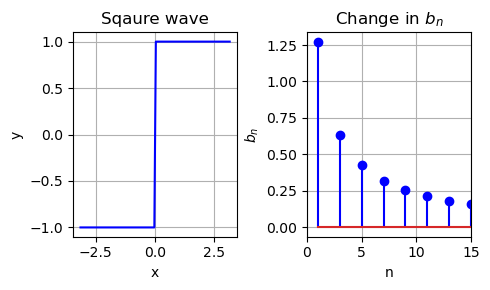

In [144]:
#Square wave
import numpy as np
import matplotlib.pyplot as plt
x_a = np.linspace(-np.pi, np.pi, 100)
x_index = [i for i in range(1, 39, 2)]
bn_regular = [(4/(n*np.pi))for n in range(1, 20)] 

fx = np.sign(np.sin(x_a))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 3))


ax1.plot(x_a, fx, 'b')
ax1.set_title('Sqaure wave')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.grid(True)



ax2.stem(x_index, bn_regular, linefmt='b-', markerfmt='bo', label='Regular')
ax2.set_title('Change in $b_n$')
ax2.set_xlabel('n')
ax2.set_ylabel('$b_n$')
ax2.grid(True)
ax2.set_xlim(0, 15)


# Adjust layout
plt.tight_layout()
plt.savefig("sqaurewave.jpg")
plt.show()

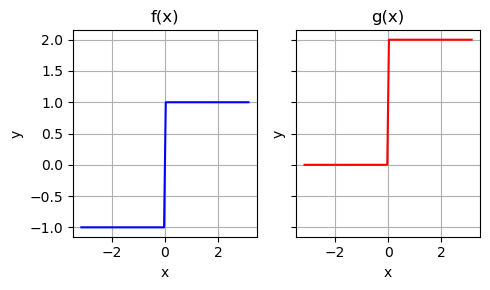

In [138]:
#Vertical Shift
import numpy as np
import matplotlib.pyplot as plt
x_a = np.linspace(-np.pi, np.pi, 100)
fx = np.sign(np.sin(x_a))
gx = fx + 1

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 3), sharey = True)


ax1.plot(x_a, fx, 'b')
ax1.set_title('f(x)')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.grid(True)



ax2.plot(x_a, gx, 'r')
ax2.set_title('g(x)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.grid(True)


# Adjust layout
plt.tight_layout()
plt.savefig("vertical_shift.png")
plt.show()


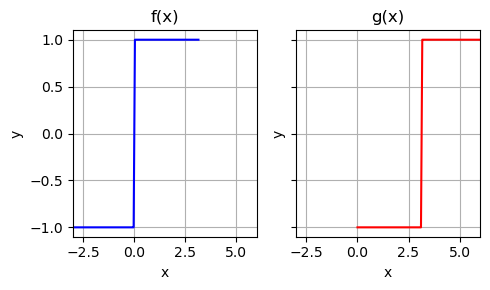

In [139]:
#Horizontal Shift
import numpy as np
import matplotlib.pyplot as plt
x_c = np.linspace(0, 2*np.pi, 100)
fx = np.sign(np.sin(x_a))
gx = np.sign(-1 * np.sin(x_c))
gx[0] = -1

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 3), sharey = True)


ax1.plot(x_a, fx, 'b')
ax1.set_title('f(x)')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_xlim(-3, 6)
ax1.grid(True)



ax2.plot(x_c, gx, 'r')
ax2.set_title('g(x)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_xlim(-3, 6)
ax2.grid(True)


# Adjust layout
plt.tight_layout()
plt.savefig("horizontal_shift.jpg")
plt.show()

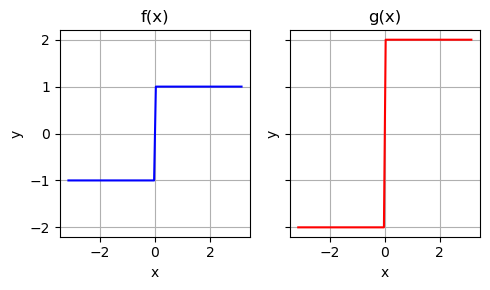

In [140]:
#Vertical scaling
import numpy as np
import matplotlib.pyplot as plt
x_a = np.linspace(-np.pi, np.pi, 100)
fx = np.sign(np.sin(x_a))
gx = 2*fx

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 3), sharey = True)


ax1.plot(x_a, fx, 'b')
ax1.set_title('f(x)')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.grid(True)



ax2.plot(x_a, gx, 'r')
ax2.set_title('g(x)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.grid(True)


# Adjust layout
plt.tight_layout()
plt.savefig("vertical_scaling.png")
plt.show()

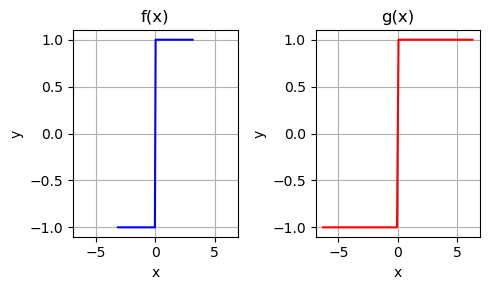

In [141]:
#Horizontal Scaling
import numpy as np
import matplotlib.pyplot as plt
x_c = np.linspace(-2*np.pi, 2*np.pi, 100)
fx = np.sign(np.sin(x_a))
gx = np.sign(np.sin(x_c/2))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 3), sharex = True)


ax1.plot(x_a, fx, 'b')
ax1.set_title('f(x)')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.grid(True)



ax2.plot(x_c, gx, 'r')
ax2.set_title('g(x)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.grid(True)


# Adjust layout
plt.tight_layout()
plt.savefig("horizontal_scaling.jpg")
plt.show()

In [128]:
#x_values = np.linspace(0, 10, 21)
x_values = np.arange(0, 21) + 0.5
x_values_compressed = np.linspace(0, 5, 21) 
x_index = [i for i in range(1, 39, 2)]
print(x_index)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37]


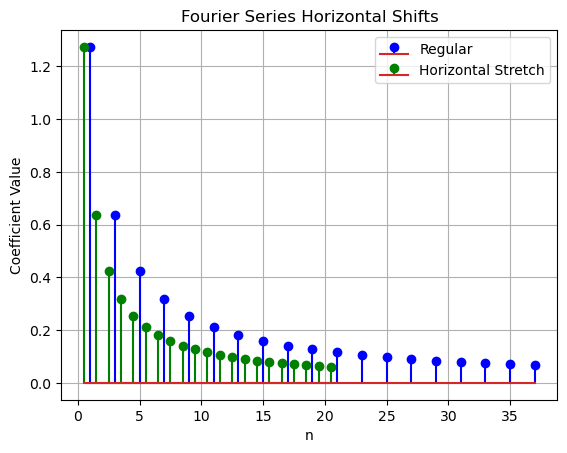

In [111]:
bn_regular = [(4/(n*np.pi))for n in range(1, 20)] 
bn_hshift = [(-4/(n*np.pi))for n in range(1, 20)]
bn_hstretch = [(4/(n*np.pi))for n in range(1, 22)]
bn_compressed = [(4/(n*np.pi)) for n in range(1, 22)] 


plt.stem(x_index, bn_regular, linefmt='b-', markerfmt='bo', label='Regular')
#plt.stem(bn_hshift, linefmt='r-', markerfmt='ro', label='Horizontal Shift')
plt.stem(x_values, bn_hstretch, linefmt='g-', markerfmt='go', label='Horizontal Stretch')
#plt.stem(x_values_compressed, bn_compressed, linefmt='m-', markerfmt='mo', label='Compressed')

plt.legend()
plt.xlabel('n')
plt.ylabel('Coefficient Value')
plt.title('Fourier Series Horizontal Shifts')
plt.grid(True)
plt.savefig("horizontal_stem_stretch.jpg")
plt.show()

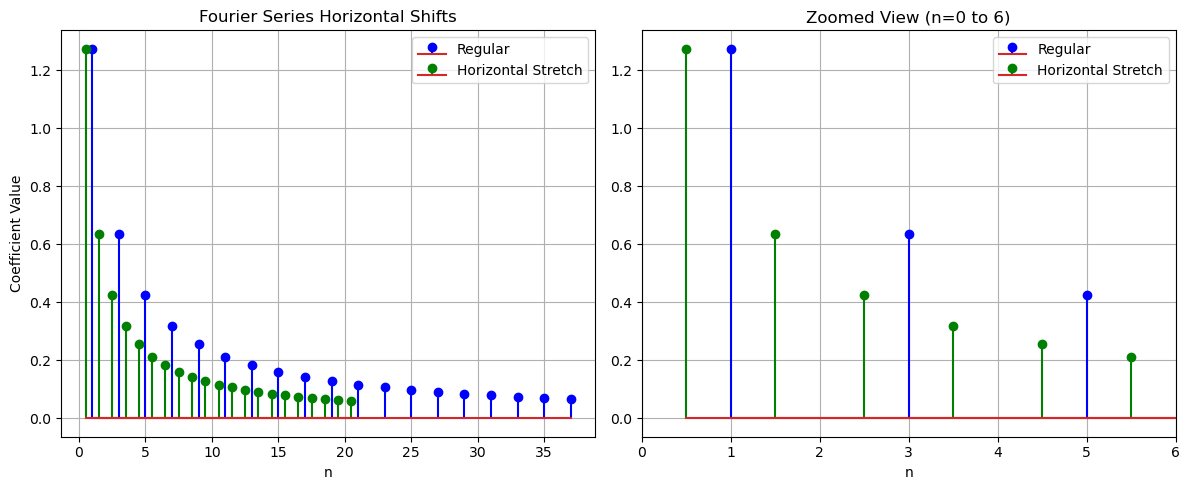

In [142]:
import numpy as np
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# First subplot - Your original plot
ax1.stem(x_index, bn_regular, linefmt='b-', markerfmt='bo', label='Regular')
ax1.stem(x_values, bn_hstretch, linefmt='g-', markerfmt='go', label='Horizontal Stretch')
ax1.legend()
ax1.set_xlabel('n')
ax1.set_ylabel('Coefficient Value')
ax1.set_title('Fourier Series Horizontal Shifts')
ax1.grid(True)


ax2.stem(x_index, bn_regular, linefmt='b-', markerfmt='bo', label='Regular')
ax2.stem(x_values, bn_hstretch, linefmt='g-', markerfmt='go', label='Horizontal Stretch')
ax2.legend()
ax2.set_xlabel('n')
ax2.set_title('Zoomed View (n=0 to 6)')
ax2.grid(True)
ax2.set_xlim(0, 6)

plt.tight_layout()
plt.savefig("horizontal_stem_stretch.jpg")
plt.show()

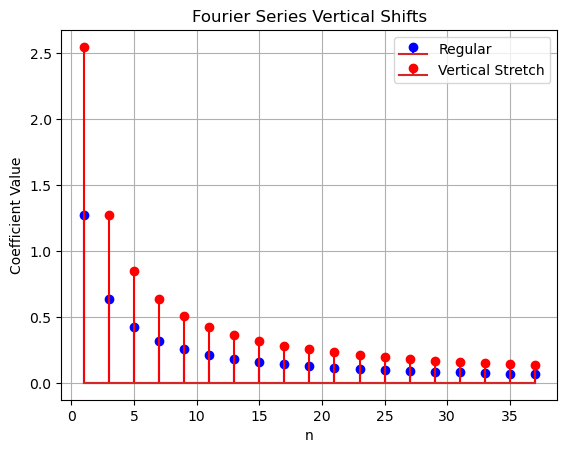

In [143]:
bn_regular = [(4/(n*np.pi))for n in range(1, 20)] 
bn_vstretch = [(8/(n*np.pi))for n in range(1, 20)]
bn_vshift2 = [0.5 + (2/(n*np.pi))for n in range(1, 22)]
bn_compressed = [(2/(n*np.pi)) for n in range(1, 22)] 


plt.stem(x_index, bn_regular, linefmt='b-', markerfmt='bo', label='Regular')
plt.stem(x_index, bn_vstretch, linefmt='r-', markerfmt='ro', label='Vertical Stretch')
#plt.stem( bn_vshift2, linefmt='g-', markerfmt='go', label='Vertical Stretch')
#plt.stem( bn_compressed, linefmt='m-', markerfmt='mo', label='Compressed')

plt.legend()
plt.xlabel('n')
plt.ylabel('Coefficient Value')
plt.title('Fourier Series Vertical Shifts')
plt.grid(True)
plt.savefig("vertical_stem_stretch.jpg")
plt.show()

### Staircase

$$f(x) = \frac{3}{4} - \sum_{n=1}^{\infty} \left[ \frac{\sin\left(\frac{n\pi}{2}\right)}{n\pi} \cos(nx) - \frac{1 + \cos\left(\frac{n\pi}{2}\right) - 2\cos(n\pi)}{n\pi} \sin(nx) \right]$$

In [19]:
def fourier_series_stair(x, n):
    f = 0.75  # a0 term
    for n in range(1, n + 1):
        an = -np.sin(n * np.pi / 2) / (n * np.pi)
        bn = (1 + np.cos(n * np.pi / 2) - 2 * np.cos(n * np.pi)) / (n * np.pi)
        f += an * np.cos(n * x) + bn * np.sin(n * x)
    return f

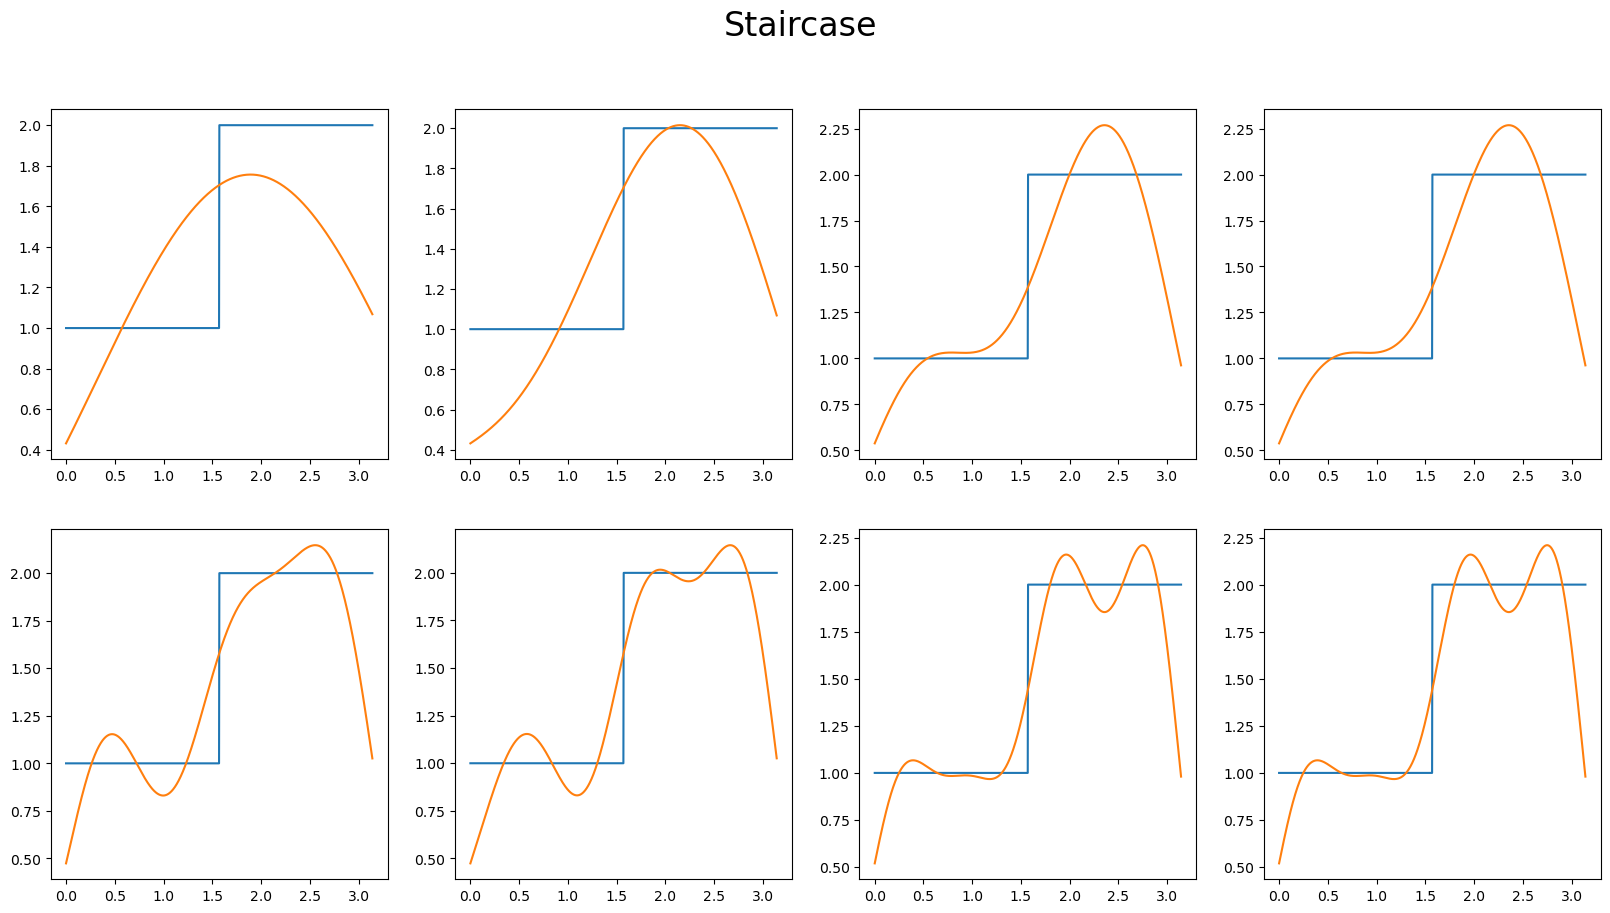

In [21]:
x1 = x_b.copy()
x1[:len(x_b)//2] = 1
x1[len(x_b)//2:] = 2
approx_fs(x_b, fourier_series_stair, x1, 'Staircase')

In the above plot we see that it converges much slower. To make sure that it converges we plot it for n = 100.

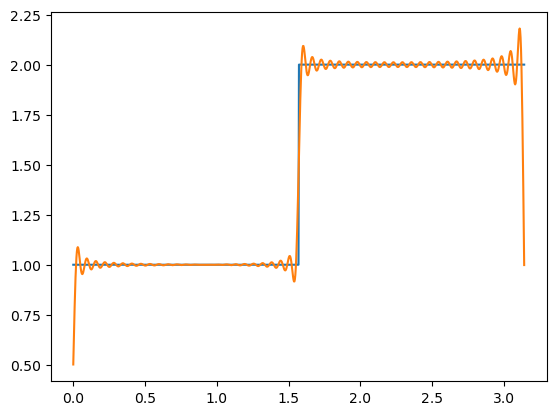

In [ ]:
plt.plot(x_b, x1)
plt.plot(x_b, fourier_series_stair(x_b, 100))